In [3]:
import numpy as np
import matplotlib.pyplot as plt

class Neuron:
    def __init__(self, weights, bias=0):
        """
        Инициализация нейрона
        
        Args:
            weights: массив весов
            bias: смещение (порог)
        """
        self.weights = np.array(weights)
        self.bias = bias
    
    def weighted_sum(self, inputs):
        """Вычисление взвешенной суммы"""
        return np.dot(self.weights, np.array(inputs)) + self.bias
    
    def sigmoid(self, x):
        """Сигмоидальная функция активации"""
        return 1 / (1 + np.exp(-x))
    
    def relu(self, x):
        """ReLU функция активации"""
        return np.maximum(0, x)
    
    def threshold(self, x, threshold=0):
        """Пороговая функция активации"""
        return 1.0 if x > threshold else 0.0
    
    def activate(self, inputs, activation_type='sigmoid'):
        """
        Активация нейрона с заданной функцией
        
        Args:
            inputs: входные данные
            activation_type: тип функции активации ('sigmoid', 'relu', 'threshold')
        """
        z = self.weighted_sum(inputs)
        
        if activation_type == 'sigmoid':
            return self.sigmoid(z)
        elif activation_type == 'relu':
            return self.relu(z)
        elif activation_type == 'threshold':
            return self.threshold(z)
        else:
            raise ValueError("Неизвестный тип активации")

weights = [0.5, -0.3, 0.8]
bias = 0.1
neuron = Neuron(weights, bias)

inputs = [1.0, 2.0, 0.5]
print("Входные данные:", inputs)
print("Веса:", weights)
print("Смещение:", bias)
print("\nРезультаты для конкретного входа:")
print(f"Сигмоида: {neuron.activate(inputs, 'sigmoid'):.4f}")
print(f"ReLU: {neuron.activate(inputs, 'relu'):.4f}")
print(f"Пороговая: {neuron.activate(inputs, 'threshold')}")

Входные данные: [1.0, 2.0, 0.5]
Веса: [0.5, -0.3, 0.8]
Смещение: 0.1

Результаты для конкретного входа:
Сигмоида: 0.5987
ReLU: 0.4000
Пороговая: 1.0


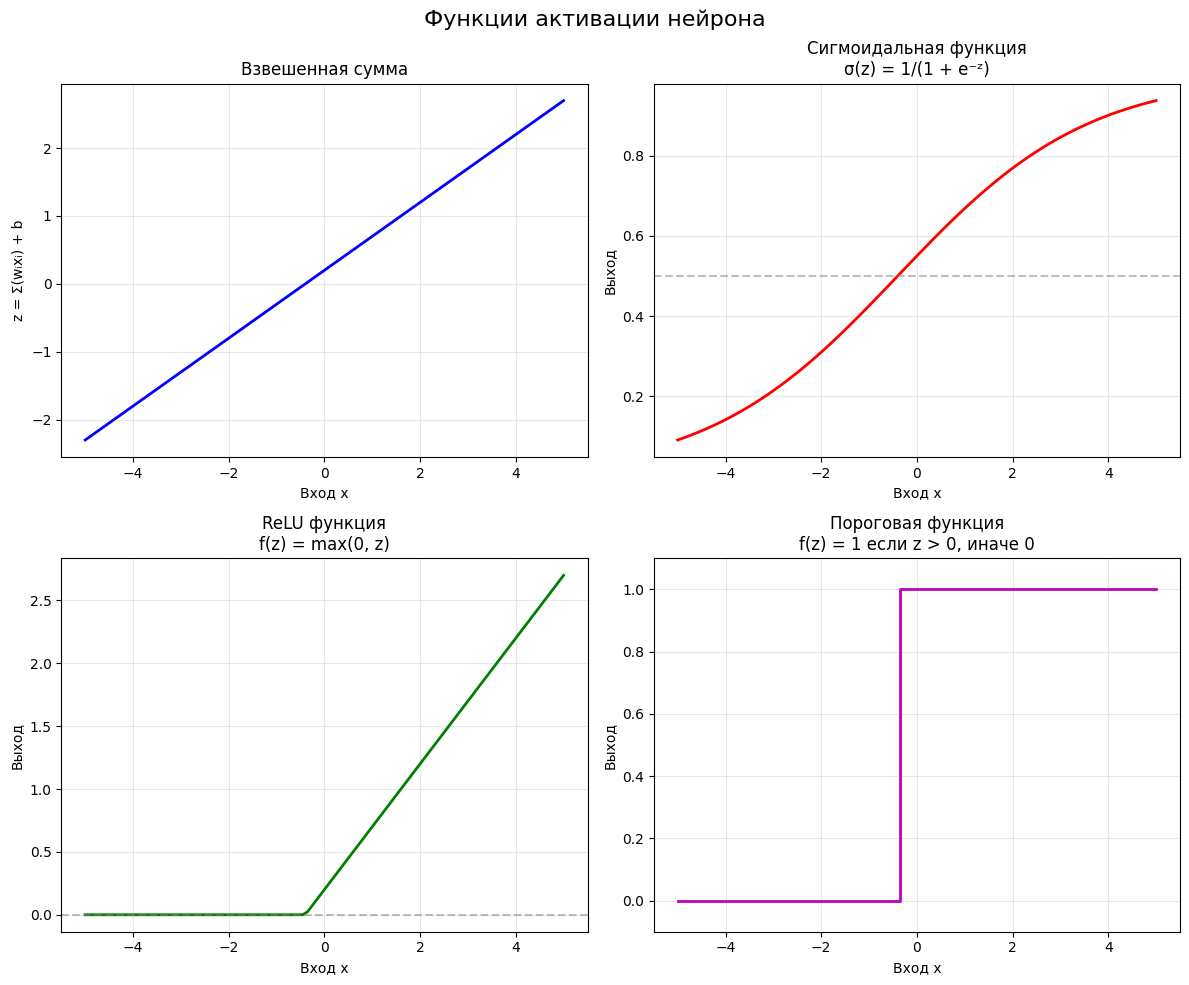


Тест 1: входы = [-2.0, 1.0, 0.5]
Взвешенная сумма: -0.8000
Сигмоида: 0.3100
ReLU: 0.0000
Пороговая: 0.0

Тест 2: входы = [0.0, 1.0, 0.5]
Взвешенная сумма: 0.2000
Сигмоида: 0.5498
ReLU: 0.2000
Пороговая: 1.0

Тест 3: входы = [3.0, 1.0, 0.5]
Взвешенная сумма: 1.7000
Сигмоида: 0.8455
ReLU: 1.7000
Пороговая: 1.0

Тест 4: входы = [10.0, 1.0, 0.5]
Взвешенная сумма: 5.2000
Сигмоида: 0.9945
ReLU: 5.2000
Пороговая: 1.0


In [4]:
def plot_activation_functions(neuron, input_range=(-5, 5), num_points=100):

    x = np.linspace(input_range[0], input_range[1], num_points)
    
    fixed_inputs = [1.0, 0.5]
    
    sigmoid_outputs = []
    relu_outputs = []
    threshold_outputs = []
    
    for val in x:
        full_inputs = [val] + fixed_inputs
        sigmoid_outputs.append(neuron.activate(full_inputs, 'sigmoid'))
        relu_outputs.append(neuron.activate(full_inputs, 'relu'))
        threshold_outputs.append(neuron.activate(full_inputs, 'threshold'))
    
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    fig.suptitle('Функции активации нейрона', fontsize=16)
    
    weighted_sums = [neuron.weighted_sum([val] + fixed_inputs) for val in x]
    axes[0, 0].plot(x, weighted_sums, 'b-', linewidth=2)
    axes[0, 0].set_title('Взвешенная сумма')
    axes[0, 0].set_xlabel('Вход x')
    axes[0, 0].set_ylabel('z = Σ(wᵢxᵢ) + b')
    axes[0, 0].grid(True, alpha=0.3)
    
    axes[0, 1].plot(x, sigmoid_outputs, 'r-', linewidth=2)
    axes[0, 1].set_title('Сигмоидальная функция\nσ(z) = 1/(1 + e⁻ᶻ)')
    axes[0, 1].set_xlabel('Вход x')
    axes[0, 1].set_ylabel('Выход')
    axes[0, 1].grid(True, alpha=0.3)
    axes[0, 1].axhline(y=0.5, color='gray', linestyle='--', alpha=0.5)
    
    axes[1, 0].plot(x, relu_outputs, 'g-', linewidth=2)
    axes[1, 0].set_title('ReLU функция\nf(z) = max(0, z)')
    axes[1, 0].set_xlabel('Вход x')
    axes[1, 0].set_ylabel('Выход')
    axes[1, 0].grid(True, alpha=0.3)
    axes[1, 0].axhline(y=0, color='gray', linestyle='--', alpha=0.5)
    
    axes[1, 1].plot(x, threshold_outputs, 'm-', linewidth=2, drawstyle='steps-post')
    axes[1, 1].set_title('Пороговая функция\nf(z) = 1 если z > 0, иначе 0')
    axes[1, 1].set_xlabel('Вход x')
    axes[1, 1].set_ylabel('Выход')
    axes[1, 1].grid(True, alpha=0.3)
    axes[1, 1].set_ylim(-0.1, 1.1)
    
    plt.tight_layout()
    plt.show()
    
    return fig

plot_activation_functions(neuron)

test_inputs = [
    [-2.0, 1.0, 0.5],
    [0.0, 1.0, 0.5],
    [3.0, 1.0, 0.5],
    [10.0, 1.0, 0.5]
]

for i, test_in in enumerate(test_inputs):
    print(f"\nТест {i+1}: входы = {test_in}")
    z = neuron.weighted_sum(test_in)
    print(f"Взвешенная сумма: {z:.4f}")
    print(f"Сигмоида: {neuron.activate(test_in, 'sigmoid'):.4f}")
    print(f"ReLU: {neuron.activate(test_in, 'relu'):.4f}")
    print(f"Пороговая: {neuron.activate(test_in, 'threshold')}")